# Get The Data


In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
data =[]
label =[]
directory = r'Downloads\Dataset\train'
categ = ['with_mask','without_mask']
for cat in categ:
    path = os.path.join(directory,cat)
    for img in os.listdir(path):
        img_path = os.path.join(path,img)
        try:
            image = load_img(img_path,grayscale=False,color_mode='rgb',target_size=(150,150,3))
            image = img_to_array(image)
            data.append(image)
            label.append(cat)
        except:
            continue

C:\Users\omar mohamed\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
C:\Users\omar mohamed\Anaconda3\lib\site-packages\PIL\Image.py:2821: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


In [4]:
lb = LabelBinarizer()
lb.fit(label)
label = np.array(lb.transform(label))
label = to_categorical(label)
data = np.array(data,dtype='float32')

In [5]:
data.shape

(4641, 150, 150, 3)

In [6]:
label.shape

(4641, 2)

In [7]:
label

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [8]:
X_train ,X_valid, y_train , y_valid = train_test_split(data,label,stratify=label,test_size=0.15,shuffle=True)

In [9]:
X_train ,X_valid = X_train/255.0 ,X_valid/255.0

In [10]:
X_train.shape

(3944, 150, 150, 3)

In [11]:
X_valid.shape

(697, 150, 150, 3)

In [12]:
y_train

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

# Build Model

In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
model = Sequential()
model.add(Conv2D(filters = 140,kernel_size=3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPool2D(2))
model.add(Conv2D(filters = 160,kernel_size=3,activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(filters = 180,kernel_size=3,activation='relu'))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(100,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(2, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 140)     3920      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 140)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 160)       201760    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 160)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 180)       259380    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 180)       0         
_________________________________________________________________
flatten (Flatten)            (None, 52020)             0

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
datagen = ImageDataGenerator(rotation_range=20,zoom_range=0.15,
                   width_shift_range=0.2,
                   height_shift_range=0.2,
                   shear_range=0.15,
                   horizontal_flip=True,
                   fill_mode="nearest")
datagen.fit(X_train)
model.fit_generator(datagen.flow(X_train,y_train,batch_size=32),steps_per_epoch=X_train.shape[0] // 32 #batch_size
          ,epochs=40,validation_data=(X_valid,y_valid),callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/40
123/123 [==============================] - 432s 4s/step - loss: 0.4513 - accuracy: 0.7753 - val_loss: 0.2154 - val_accuracy: 0.9326
Epoch 2/40
123/123 [==============================] - 424s 3s/step - loss: 0.3078 - accuracy: 0.8870 - val_loss: 0.2177 - val_accuracy: 0.9440
Epoch 3/40
123/123 [==============================] - 422s 3s/step - loss: 0.2884 - accuracy: 0.8896 - val_loss: 0.1580 - val_accuracy: 0.9484
Epoch 4/40
123/123 [==============================] - 424s 3s/step - loss: 0.2928 - accuracy: 0.8908 - val_loss: 0.1665 - val_accuracy: 0.9455
Epoch 5/40
123/123 [==============================] - 421s 3s/step - loss: 0.2595 - accuracy: 0.9054 - val_loss: 0.1495 - val_accuracy: 0.9484
Epoch 6/40
123/123 [==============================] - 421s 3s/step - loss: 0.2355 - accuracy: 0.9100 - val_loss: 0.1338 - val_accuracy: 0.9512
Epoch 7/40
123/123 [==============================] - 421s 3s/step - loss: 0.2378 - accuracy: 0.9090 - val_loss: 0.1653 - val_accuracy: 0.9484

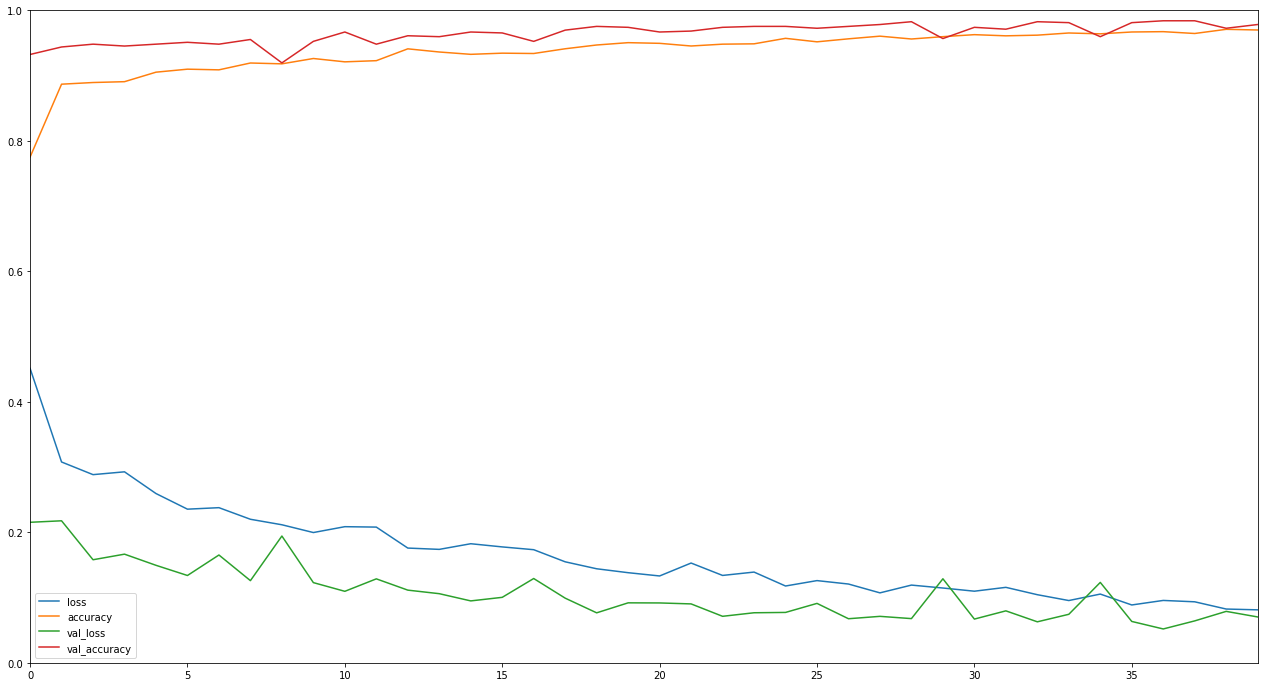

In [19]:
pd.DataFrame(model.history.history).plot(figsize=(22, 12))
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Test

In [20]:
X_test =[]
y_test =[]
directory = 'Downloads\\Dataset\\test'
category = ['without_mask','with_mask']
for cat in category:
    path = os.path.join(directory,cat)
    for img in os.listdir(path):
        img_path = os.path.join(path,img)
        try:
            image2 = load_img(img_path,grayscale=False,color_mode='rgb',target_size=(150,150,3))
            image2 = img_to_array(image2)
            X_test.append(image2)
            y_test.append(cat)
        except:
            continue

In [21]:
X_test = np.array(X_test,dtype='float32')/255.0
y_test = np.array(y_test)
y_test = lb.fit_transform(y_test)
y_test = to_categorical(y_test)

In [22]:
import random
x= list(zip(X_test,y_test))
random.shuffle(x)
X_test,y_test = zip(*x)
X_test,y_test = np.array(X_test),np.array(y_test)

In [23]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 3s 438ms/step - loss: 0.0421 - accuracy: 0.9845


[0.04208073765039444, 0.9845361113548279]

# Random Test

In [78]:
masks =[]
directory = r'Downloads\te'
for img in os.listdir(directory):
    img_path = os.path.join(directory,img)
    try:
        image5 = load_img(img_path,grayscale=False,color_mode='rgb',target_size=(150,150,3))
        image5 = img_to_array(image5)
        masks.append(image5)
    except:
        continue
masks = np.array(masks,dtype='float32')
masks = masks/255.0

In [80]:
masks.shape

(30, 150, 150, 3)

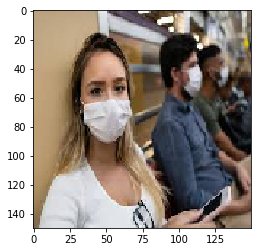

With Mask
********************************


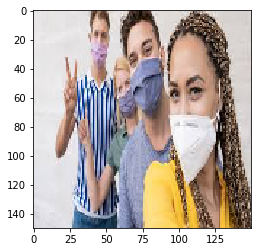

With Mask
********************************


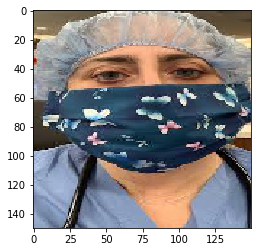

With Mask
********************************


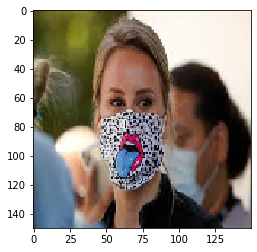

With Mask
********************************


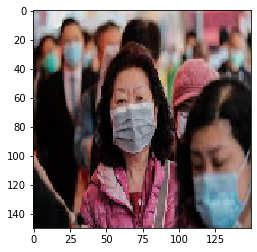

With Mask
********************************


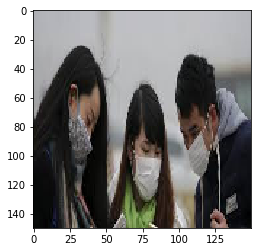

With Mask
********************************


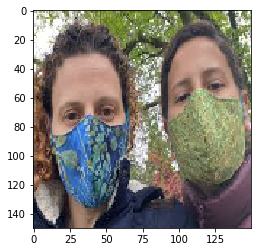

With Mask
********************************


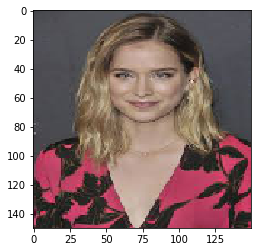

Without Mask
********************************


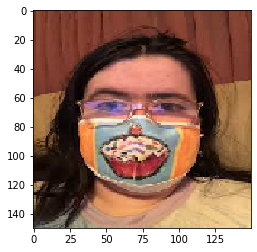

With Mask
********************************


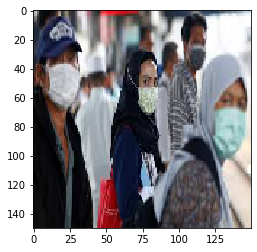

With Mask
********************************


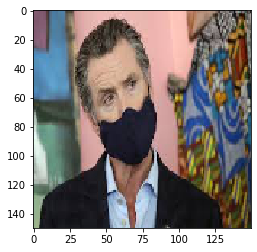

With Mask
********************************


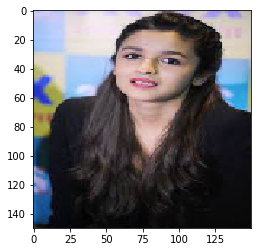

Without Mask
********************************


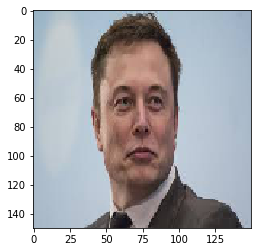

Without Mask
********************************


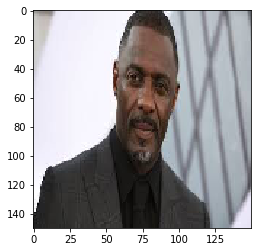

Without Mask
********************************


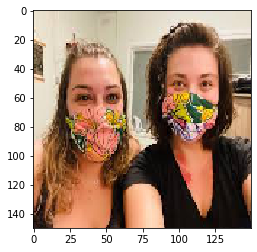

With Mask
********************************


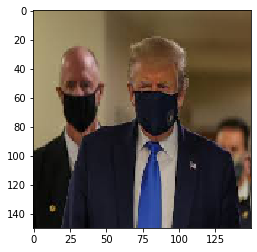

With Mask
********************************


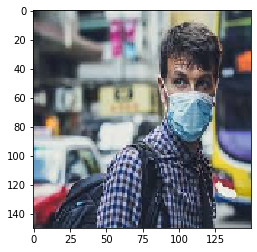

With Mask
********************************


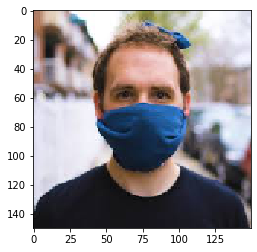

With Mask
********************************


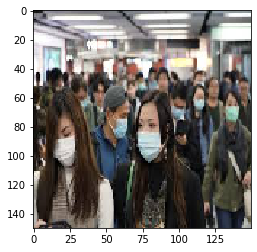

With Mask
********************************


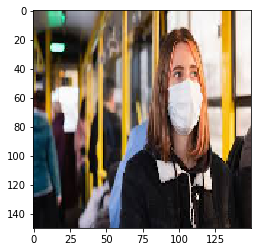

With Mask
********************************


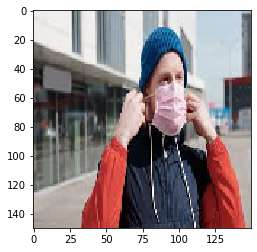

With Mask
********************************


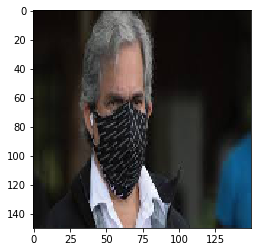

With Mask
********************************


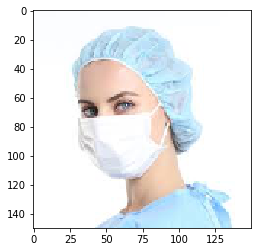

With Mask
********************************


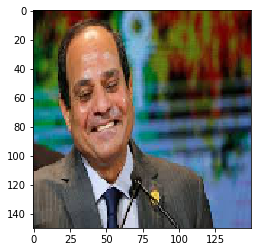

Without Mask
********************************


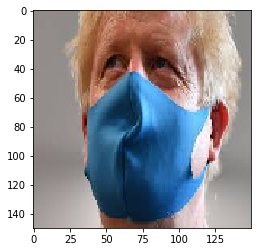

With Mask
********************************


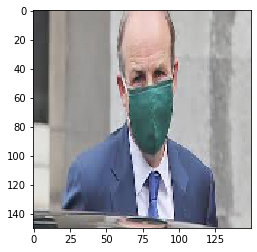

With Mask
********************************


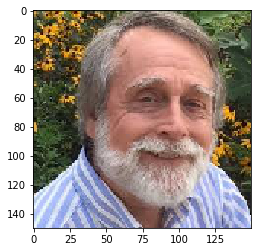

Without Mask
********************************


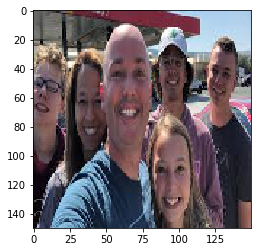

Without Mask
********************************


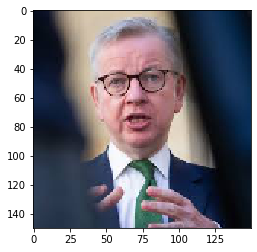

Without Mask
********************************


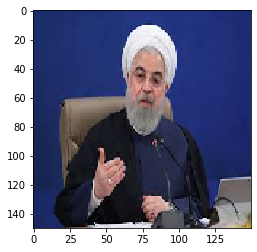

Without Mask
********************************


In [81]:
for i,j in enumerate(model.predict_classes(masks)):
    if j == 0:
        plt.imshow(masks[i])
        plt.show()
        print('With Mask')
        print('********************************')
    else:
        plt.imshow(masks[i])
        plt.show()
        print('Without Mask')
        print('********************************')